Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as vehCo2nmmp
import pandas as vehCo2pnd
import warnings as vehCo2wrgs
import seaborn as vehCo2_sbn
vehCo2wrgs.filterwarnings("ignore", category=UserWarning, message=".*Maximum number of iterations.*")
import matplotlib.pyplot as vehCo2_mpyplt


In [27]:
vehicleCo2 = vehCo2pnd.read_csv('CO2 Emissions_Canada.csv')
vehicleCo2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [28]:
vehicleCo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [29]:
vehicleCo2['CO2 Emissions(g/km)'].value_counts()

,count
CO2 Emissions(g/km),
242,85
221,82
214,77
230,77
294,76
...,...
148,1
99,1
485,1


In [30]:
vehicleCo2.nunique()

,0
Make,42
Model,2053
Vehicle Class,16
Engine Size(L),51
Cylinders,8
Transmission,27
Fuel Type,5
Fuel Consumption City (L/100 km),211
Fuel Consumption Hwy (L/100 km),143
Fuel Consumption Comb (L/100 km),181


In [31]:
vehicleCo2 = vehicleCo2.drop(['Make','Model'], axis=1)
print("Empty values in the Vehicle Analysis: ", vehicleCo2.isnull().values.sum())
vehicleCo2.isnull().sum()

Empty values in the Vehicle Analysis:  0


,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0
Fuel Consumption Comb (mpg),0
CO2 Emissions(g/km),0


In [7]:
print("Shape of Vehicle Analysis Data: ", vehicleCo2.shape)
print("Duplicate Rows in the Vehicle Analysis: ", vehicleCo2.duplicated().values.sum())

Shape of Vehicle Analysis Data:  (7385, 10)
Duplicate Rows in the Vehicle Analysis:  2453


In [8]:
vehicleCo2 = vehicleCo2.drop_duplicates()
print("\nDuplicates Removed. Shape of Cleaned data is: ",vehicleCo2.shape)


Duplicates Removed. Shape of Cleaned data is:  (4932, 10)


In [32]:
print("Summary Statistics of Vehicle Data:")
print(vehicleCo2.describe())

Summary Statistics of Vehicle Data:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min        

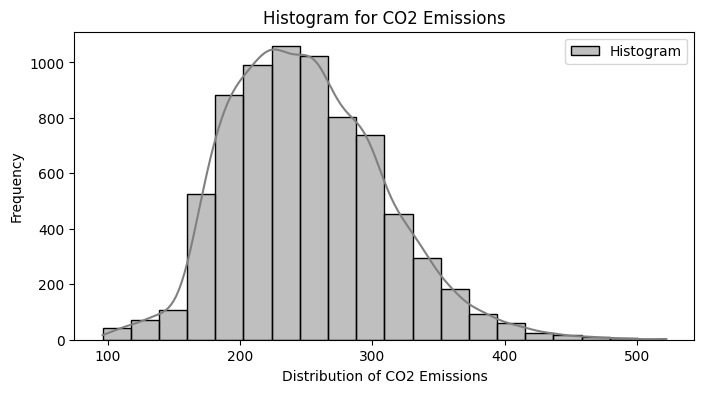

In [33]:
vehCo2_mpyplt.figure(figsize=(8, 4))
vehCo2_sbn.histplot(vehicleCo2['CO2 Emissions(g/km)'], bins=20, kde=True, color='grey', label='Histogram')
vehCo2_mpyplt.xlabel('Distribution of CO2 Emissions')
vehCo2_mpyplt.ylabel('Frequency')
vehCo2_mpyplt.title('Histogram for CO2 Emissions')
vehCo2_mpyplt.legend()
vehCo2_mpyplt.show()

<ipython-input-34-202231f77d8f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vehCo2dist = vehCo2_sbn.distplot(vehicleCo2['CO2 Emissions(g/km)'], color ='cyan', bins = 20)


[Text(0.5, 1.0, 'Distribution of CO2 Emissions')]

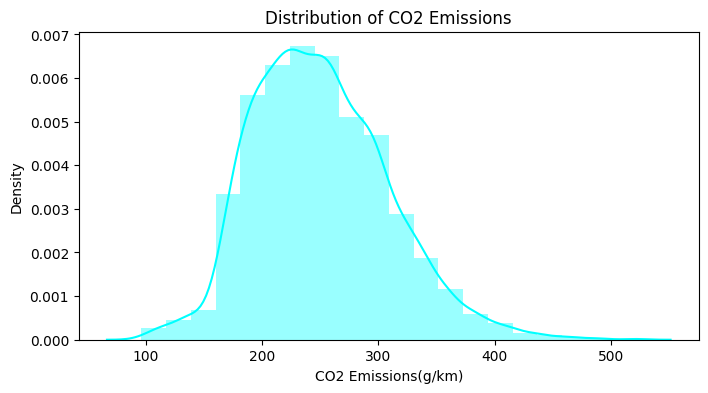

In [34]:
# Distribution plot for 'CO2 Emissions'
vehCo2_mpyplt.figure(figsize=(8, 4))
vehCo2dist = vehCo2_sbn.distplot(vehicleCo2['CO2 Emissions(g/km)'], color ='cyan', bins = 20)
vehCo2dist.set(title ='Distribution of CO2 Emissions')

<ipython-input-35-d2ff75312064>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vehCo2_sbn.barplot(x=veh_cl.index, y=veh_cl.values, palette="Pastel2")
<ipython-input-35-d2ff75312064>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vehCo2_sbn.barplot(x=veh_cl.index, y=veh_cl.values, palette="Pastel2")


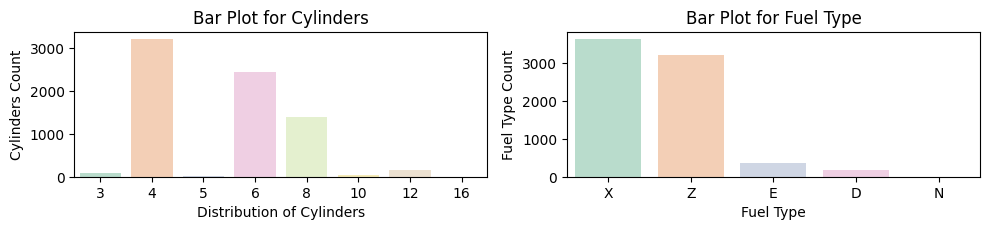

In [35]:
vehCo2_mpyplt.figure(figsize=(10, 4))

# Bar Plot for 'Cylinders'
vehCo2_mpyplt.subplot(2, 2, 1)
veh_cl = vehicleCo2['Cylinders'].value_counts()
vehCo2_sbn.barplot(x=veh_cl.index, y=veh_cl.values, palette="Pastel2")
vehCo2_mpyplt.title("Bar Plot for Cylinders")
vehCo2_mpyplt.xlabel("Distribution of Cylinders")
vehCo2_mpyplt.ylabel("Cylinders Count")


# Bar Plot for 'Fuel Types'
vehCo2_mpyplt.subplot(2, 2, 2)
veh_cl = vehicleCo2['Fuel Type'].value_counts()
vehCo2_sbn.barplot(x=veh_cl.index, y=veh_cl.values, palette="Pastel2")
vehCo2_mpyplt.title("Bar Plot for Fuel Type")
vehCo2_mpyplt.xlabel("Fuel Type")
vehCo2_mpyplt.ylabel("Fuel Type Count")

vehCo2_mpyplt.tight_layout()
vehCo2_mpyplt.show()

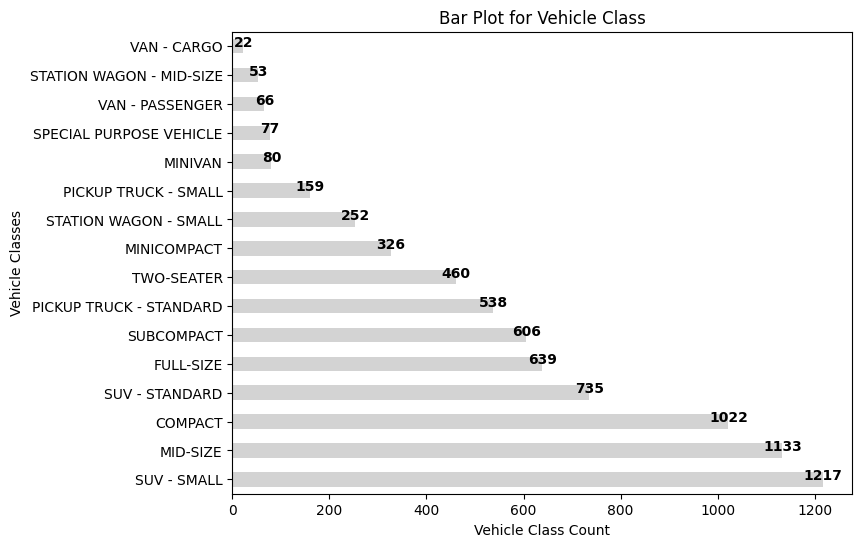

In [36]:
# Bar Plot for 'Vehicle Class'
vehCo2_mpyplt.figure(figsize=(8, 6))
vc_cnts = vehicleCo2['Vehicle Class'].value_counts()
vc_cnts.plot(kind='barh', color='lightgrey')
vehCo2_mpyplt.title('Bar Plot for Vehicle Class')
vehCo2_mpyplt.ylabel('Vehicle Classes')
vehCo2_mpyplt.xlabel('Vehicle Class Count')


# Display count values above the bars
for vi, vv in enumerate(vc_cnts):
    vehCo2_mpyplt.text(vv + 1, vi, str(vv), ha='center', fontsize=10, fontweight='bold')

vehCo2_mpyplt.show()

In [37]:
vehicleCo2.select_dtypes(include=['object']).columns

Index(['Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [38]:
# Convert the object column to numerical values
from sklearn import preprocessing as vehCo2prep
vehCo2enc = vehCo2prep.LabelEncoder()
vehicleCo2['Vehicle Class']= vehCo2enc.fit_transform(vehicleCo2['Vehicle Class'])
vehicleCo2['Transmission']= vehCo2enc.fit_transform(vehicleCo2['Transmission'])
vehicleCo2['Fuel Type']= vehCo2enc.fit_transform(vehicleCo2['Fuel Type'])

In [39]:
vehicleCo2.to_csv('processed_vehicledata.csv', index=False)
vehicleCo2

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,12,2.0,4,17,4,11.2,8.3,9.9,29,232


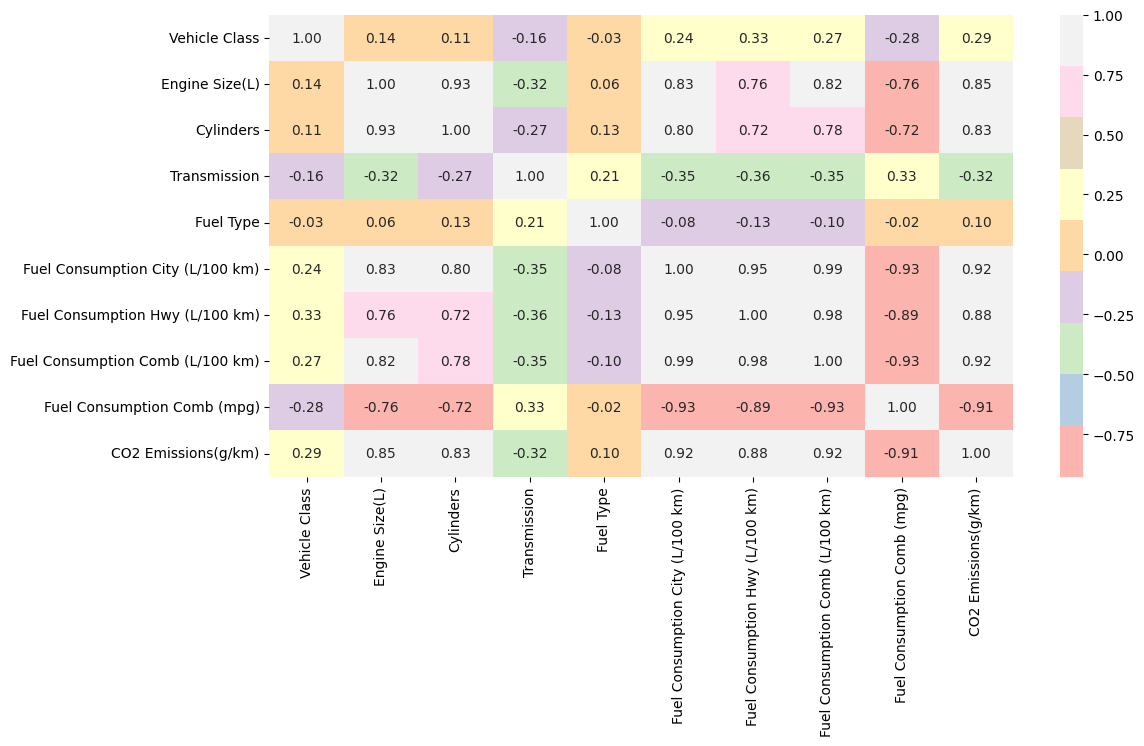

In [40]:
vehCo2_mpyplt.figure(figsize=(12, 6))
vehCo2_correlation = vehicleCo2.corr()
vehCo2_sbn.heatmap(vehCo2_correlation, annot=True, cmap='Pastel1', fmt='.2f')
vehCo2_mpyplt.show()

In [41]:
from sklearn.model_selection import train_test_split as vehCo2_trvats

print("\nTraditional Mean Regression for Vehicle CO2 Emissions:")
vehCo2X = vehicleCo2.drop('CO2 Emissions(g/km)',axis=1)
vehCo2y = vehicleCo2['CO2 Emissions(g/km)']

vehCo2Xtrn, vehCo2Xtst, vehCo2Ytrn, vehCo2Ytst = vehCo2_trvats(vehCo2X, vehCo2y, test_size=0.4, random_state=22)
vehCo2Xvan, vehCo2Xtst, vehCo2Yvan, vehCo2Ytst = vehCo2_trvats(vehCo2Xtst, vehCo2Ytst, test_size=0.5, random_state=22)
print(f"60% of training set: {vehCo2Xtrn.shape}, 20% of testing set: {vehCo2Xvan.shape}, 20% of validation set: {vehCo2Xvan.shape}")


Traditional Mean Regression for Vehicle CO2 Emissions:
60% of training set: (4431, 9), 20% of testing set: (1477, 9), 20% of validation set: (1477, 9)


### 1. Traditional Mean Regression (Linear Regression)

In [42]:
from sklearn.linear_model import LinearRegression as vehCo2Linear_Regress
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.regression.quantile_regression import QuantReg

vehCo2_lineareg = vehCo2Linear_Regress()
print("Training on Traditional Mean -",vehCo2_lineareg.fit(vehCo2Xtrn, vehCo2Ytrn))

## Prediction for testing
vehCo2Y_qauntpred = vehCo2_lineareg.predict(vehCo2Xtst)

vehCo2r2 = r2_score(vehCo2Ytst, vehCo2Y_qauntpred)
vehCo2mse = mean_squared_error(vehCo2Ytst, vehCo2Y_qauntpred)
vehCo2rmse = vehCo2nmmp.sqrt(vehCo2mse)
vehCo2mae = mean_absolute_error(vehCo2Ytst, vehCo2Y_qauntpred)

print("\nTesting Results:\n")
print(f"R-squared                     : {vehCo2r2}")
print(f"Mean Squared Error (MSE)      : {vehCo2mse}")
print(f"Root Mean Squared Error (RMSE): {vehCo2rmse}")
print(f"Mean Absolute Error (MAE)     : {vehCo2mae}")


## Prediction for validation
vehCo2Y_qauntpred = vehCo2_lineareg.predict(vehCo2Xvan)

vehCo2r2 = r2_score(vehCo2Yvan, vehCo2Y_qauntpred)
vehCo2mse = mean_squared_error(vehCo2Yvan, vehCo2Y_qauntpred)
vehCo2rmse = vehCo2nmmp.sqrt(vehCo2mse)
vehCo2mae = mean_absolute_error(vehCo2Yvan, vehCo2Y_qauntpred)

print("\nValidation Results:\n")
print(f"R-squared                     : {vehCo2r2}")
print(f"Mean Squared Error (MSE)      : {vehCo2mse}")
print(f"Root Mean Squared Error (RMSE): {vehCo2rmse}")
print(f"Mean Absolute Error (MAE)     : {vehCo2mae}")

Training on Traditional Mean - LinearRegression()

Testing Results:

R-squared                     : 0.912255755575801
Mean Squared Error (MSE)      : 289.51734518570197
Root Mean Squared Error (RMSE): 17.015209231323073
Mean Absolute Error (MAE)     : 11.15410796096355

Validation Results:

R-squared                     : 0.914493743133683
Mean Squared Error (MSE)      : 298.9449705676027
Root Mean Squared Error (RMSE): 17.290025175447337
Mean Absolute Error (MAE)     : 11.319334757124816


### 2. Quantile Regression

Testing

In [20]:
from statsmodels.regression.quantile_regression import QuantReg as vehCo2QuantReg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Calculating Pinball Loss and Quantile Score for quantile regression

def vehCo2_pinball_loss(vehCo2Ytst, vehCo2Y_qauntpred, q):
    vehCo2_error = vehCo2Ytst - vehCo2Y_qauntpred
    vehCo2_loss = vehCo2nmmp.maximum(q * vehCo2_error, (q - 1) * vehCo2_error)
    return vehCo2nmmp.mean(vehCo2_loss)

def vehCo2quantile_score(vehCo2Ytst, vehCo2Y_qauntpred, q):
    return 2 * vehCo2_pinball_loss(vehCo2Ytst, vehCo2Y_qauntpred, q)

print("\nQuantile Regression:")
vehCo2quantiles = [0.25, 0.50, 0.75]
vehCo2pinball_losses_qr = []
vehCo2quantile_scores_qr = []

for q in vehCo2quantiles:
    vehCo2quant_reg = vehCo2QuantReg(vehCo2Ytrn, vehCo2Xtrn)
    vehCo2res = vehCo2quant_reg.fit(q=q)
    vehCo2y_pred_qr = vehCo2res.predict(vehCo2Xtst)

    vehCo2pb_loss = vehCo2_pinball_loss(vehCo2Ytst, vehCo2y_pred_qr, q)
    vehCo2q_score = vehCo2quantile_score(vehCo2Ytst, vehCo2y_pred_qr, q)

    vehCo2pinball_losses_qr.append(vehCo2pb_loss)
    vehCo2quantile_scores_qr.append(vehCo2q_score)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {vehCo2pb_loss:.4f}")
    print(f"Quantile Score: {vehCo2q_score:.4f}")
    print(vehCo2res.summary())

    ## Evaluation metrics of R2, MSE and MAE
    vehCo2r2 = r2_score(vehCo2Ytst, vehCo2y_pred_qr)
    vehCo2mse = mean_squared_error(vehCo2Ytst, vehCo2y_pred_qr)
    vehCo2rmse = vehCo2nmmp.sqrt(vehCo2mse)
    vehCo2mae = mean_absolute_error(vehCo2Ytst, vehCo2y_pred_qr)

    print("\nTesting Results:\n")
    print(f"R-squared                     : {vehCo2r2}")
    print(f"Mean Squared Error (MSE)      : {vehCo2mse}")
    print(f"Root Mean Squared Error (RMSE): {vehCo2rmse}")
    print(f"Mean Absolute Error (MAE)     : {vehCo2mae}")


Quantile Regression:

Quantile 0.25:
Pinball Loss: 4.2092
Quantile Score: 8.4185
                          QuantReg Regression Results                          
Dep. Variable:     CO2 Emissions(g/km)   Pseudo R-squared:               0.7182
Model:                        QuantReg   Bandwidth:                       1.670
Method:                  Least Squares   Sparsity:                        17.07
Date:                 Mon, 28 Apr 2025   No. Observations:                 2959
Time:                         12:24:53   Df Residuals:                     2950
                                         Df Model:                            9
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Vehicle Class                        0.1606      0.033      4.801      0.000       0.095       0.226
Engine Size(L)                       1.1558      0.295 

Validation

In [24]:
def vehCo2_pinball_loss(vehCo2Yvan, vehCo2Y_qauntpred, vehCo2_q):
    vehCo2_error = vehCo2Yvan - vehCo2Y_qauntpred
    vehCo2_loss = vehCo2nmmp.maximum(vehCo2_q * vehCo2_error, (vehCo2_q - 1) * vehCo2_error)
    return vehCo2nmmp.mean(vehCo2_loss)

def vehCo2quantile_score(vehCo2Yvan, vehCo2Y_qauntpred, vehCo2_q):
    return 2 * vehCo2_pinball_loss(vehCo2Yvan, vehCo2Y_qauntpred, vehCo2_q)

print("\nQuantile Regression:")
vehCo2quantiles = [0.25, 0.50, 0.75]
vehCo2pinball_losses_qr = []
vehCo2quantile_scores_qr = []

for q in vehCo2quantiles:
    vehCo2quant_reg = vehCo2QuantReg(vehCo2Ytrn, vehCo2Xtrn)
    vehCo2res = vehCo2quant_reg.fit(vehCo2_q=q)
    vehCo2y_pred_qr = vehCo2res.predict(vehCo2Xvan)

    ## Calculating Pinball Loss and Quantile Score
    vehCo2pb_loss = vehCo2_pinball_loss(vehCo2Yvan, vehCo2y_pred_qr, q)
    vehCo2q_score = vehCo2quantile_score(vehCo2Yvan, vehCo2y_pred_qr, q)

    vehCo2pinball_losses_qr.append(vehCo2pb_loss)
    vehCo2quantile_scores_qr.append(vehCo2q_score)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {vehCo2pb_loss:.4f}")
    print(f"Quantile Score: {vehCo2q_score:.4f}")
    print(vehCo2res.summary())

    vehCo2mse = mean_squared_error(vehCo2Yvan, vehCo2y_pred_qr)
    vehCo2rmse = vehCo2nmmp.sqrt(vehCo2mse)
    vehCo2mae = mean_absolute_error(vehCo2Yvan, vehCo2y_pred_qr)
    vehCo2r2 = r2_score(vehCo2Yvan, vehCo2y_pred_qr)
    print("\nValidation Results:\n")
    print(f"R-squared                     : {vehCo2r2}")
    print(f"Mean Squared Error (MSE)      : {vehCo2mse}")
    print(f"Root Mean Squared Error (RMSE): {vehCo2rmse}")
    print(f"Mean Absolute Error (MAE)     : {vehCo2mae}")





Quantile Regression:

Quantile 0.25:
Pinball Loss: 5.5036
Quantile Score: 11.0072
                          QuantReg Regression Results                          
Dep. Variable:     CO2 Emissions(g/km)   Pseudo R-squared:               0.8196
Model:                        QuantReg   Bandwidth:                       1.111
Method:                  Least Squares   Sparsity:                        8.654
Date:                 Mon, 28 Apr 2025   No. Observations:                 2959
Time:                         12:29:13   Df Residuals:                     2950
                                         Df Model:                            9
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Vehicle Class                        0.0760      0.018      4.130      0.000       0.040       0.112
Engine Size(L)                       0.2107      0.178

### 3. Quantile Regression Forests

Testing

In [43]:
from sklearn.ensemble import RandomForestRegressor as vehCo2RandForestRegress
## Quantile Regression Forests
print("\nQuantile Regression Forests:")

vehCo2qrf = vehCo2RandForestRegress(random_state=22)
vehCo2qrf.fit(vehCo2Xtrn, vehCo2Ytrn)

# Predict on test data
vehCo2Y_qauntpred = vehCo2qrf.predict(vehCo2Xtst)

## Model performance using Pinball Loss and Quantile Score
vehCo2pinball_losses_qrf = []
vehCo2quantile_scores_qrf = []

for q in vehCo2quantiles:
    vehCo2pb_loss = vehCo2_pinball_loss(vehCo2Ytst, vehCo2Y_qauntpred, q)
    vehCo2q_score = vehCo2quantile_score(vehCo2Ytst, vehCo2Y_qauntpred, q)

    vehCo2pinball_losses_qrf.append(vehCo2pb_loss)
    vehCo2quantile_scores_qrf.append(vehCo2q_score)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {vehCo2pb_loss:.4f}")
    print(f"Quantile Score: {vehCo2q_score:.4f}")

    ## Evaluation metrics of R2, MSE and MAE
    vehCo2r2 = r2_score(vehCo2Ytst, vehCo2Y_qauntpred)
    vehCo2mse = mean_squared_error(vehCo2Ytst, vehCo2Y_qauntpred)
    vehCo2rmse = vehCo2nmmp.sqrt(vehCo2mse)
    vehCo2mae = mean_absolute_error(vehCo2Ytst, vehCo2Y_qauntpred)

    print("\nTesting Results:\n")
    print(f"R-squared                     : {vehCo2r2}")
    print(f"Mean Squared Error (MSE)      : {vehCo2mse}")
    print(f"Root Mean Squared Error (RMSE): {vehCo2rmse}")
    print(f"Mean Absolute Error (MAE)     : {vehCo2mae}")



Quantile Regression Forests:

Quantile 0.25:
Pinball Loss: 0.9553
Quantile Score: 1.9107

Testing Results:

R-squared                     : 0.9943780033808576
Mean Squared Error (MSE)      : 18.55011170816151
Root Mean Squared Error (RMSE): 4.306984061749185
Mean Absolute Error (MAE)     : 1.8913917648233498

Quantile 0.5:
Pinball Loss: 0.9457
Quantile Score: 1.8914

Testing Results:

R-squared                     : 0.9943780033808576
Mean Squared Error (MSE)      : 18.55011170816151
Root Mean Squared Error (RMSE): 4.306984061749185
Mean Absolute Error (MAE)     : 1.8913917648233498

Quantile 0.75:
Pinball Loss: 0.9361
Quantile Score: 1.8721

Testing Results:

R-squared                     : 0.9943780033808576
Mean Squared Error (MSE)      : 18.55011170816151
Root Mean Squared Error (RMSE): 4.306984061749185
Mean Absolute Error (MAE)     : 1.8913917648233498


Validation

In [44]:
## Predict on validation data
vehCo2Y_qauntpred = vehCo2qrf.predict(vehCo2Xvan)

## Model performance using Pinball Loss and Quantile Score
vehCo2pinball_losses_qrf = []
vehCo2quantile_scores_qrf = []

for q in vehCo2quantiles:
    vehCo2pb_loss = vehCo2_pinball_loss(vehCo2Yvan, vehCo2Y_qauntpred, q)
    vehCo2q_score = vehCo2quantile_score(vehCo2Yvan, vehCo2Y_qauntpred, q)

    vehCo2pinball_losses_qrf.append(vehCo2pb_loss)
    vehCo2quantile_scores_qrf.append(vehCo2q_score)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {vehCo2pb_loss:.4f}")
    print(f"Quantile Score: {vehCo2q_score:.4f}")

    ## Evaluation metrics of R2, MSE and MAE
    vehCo2r2 = r2_score(vehCo2Yvan, vehCo2Y_qauntpred)
    vehCo2mse = mean_squared_error(vehCo2Yvan, vehCo2Y_qauntpred)
    vehCo2rmse = vehCo2nmmp.sqrt(vehCo2mse)
    vehCo2mae = mean_absolute_error(vehCo2Yvan, vehCo2Y_qauntpred)

    print("\nValidation Results:\n")
    print(f"R-squared                     : {vehCo2r2}")
    print(f"Mean Squared Error (MSE)      : {vehCo2mse}")
    print(f"Root Mean Squared Error (RMSE): {vehCo2rmse}")
    print(f"Mean Absolute Error (MAE)     : {vehCo2mae}")



Quantile 0.25:
Pinball Loss: 0.9459
Quantile Score: 1.8917

Validation Results:

R-squared                     : 0.996388518287616
Mean Squared Error (MSE)      : 12.626377691892348
Root Mean Squared Error (RMSE): 3.5533614637259108
Mean Absolute Error (MAE)     : 1.9137541338969783

Quantile 0.5:
Pinball Loss: 0.9569
Quantile Score: 1.9138

Validation Results:

R-squared                     : 0.996388518287616
Mean Squared Error (MSE)      : 12.626377691892348
Root Mean Squared Error (RMSE): 3.5533614637259108
Mean Absolute Error (MAE)     : 1.9137541338969783

Quantile 0.75:
Pinball Loss: 0.9679
Quantile Score: 1.9358

Validation Results:

R-squared                     : 0.996388518287616
Mean Squared Error (MSE)      : 12.626377691892348
Root Mean Squared Error (RMSE): 3.5533614637259108
Mean Absolute Error (MAE)     : 1.9137541338969783
